In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ARQ = '../data/processed/op-exp-pre-embarque.pickle'

df = pd.read_pickle(ARQ)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7189 entries, 0 to 7240
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   cliente                             7189 non-null   object        
 1   cpf_cnpj                            7189 non-null   object        
 2   uf                                  7189 non-null   object        
 3   municipio                           7189 non-null   object        
 4   municipio_codigo                    7189 non-null   int64         
 5   data_da_contratacao                 7189 non-null   datetime64[ns]
 6   valor_da_operacao_em_reais          7189 non-null   int64         
 7   valor_desembolsado_em_reais         7189 non-null   float64       
 8   fonte_de_recurso_desembolsos        7189 non-null   object        
 9   modalidade_de_apoio                 7189 non-null   object        
 10  forma_de_apoio               

In [40]:
print("\nOperações por UF:")
print(df['uf'].value_counts().head(10))

print("\nOperações por Porte do Cliente:")
print(df['porte_do_cliente'].value_counts())

print("\nOperações por Setor BNDES:")
print(df['setor_bndes'].value_counts().head(10))


Operações por UF:
uf
SP    3014
RS    1397
SC     927
PR     603
MG     433
CE     181
RJ     151
BA     116
ES     105
PE      98
Name: count, dtype: int64

Operações por Porte do Cliente:
porte_do_cliente
GRANDE     5844
MÉDIA      1204
PEQUENA      93
MICRO        48
Name: count, dtype: int64

Operações por Setor BNDES:
setor_bndes
INDUSTRIA            6718
COMERCIO/SERVICOS     278
AGROPECUÁRIA          193
Name: count, dtype: int64


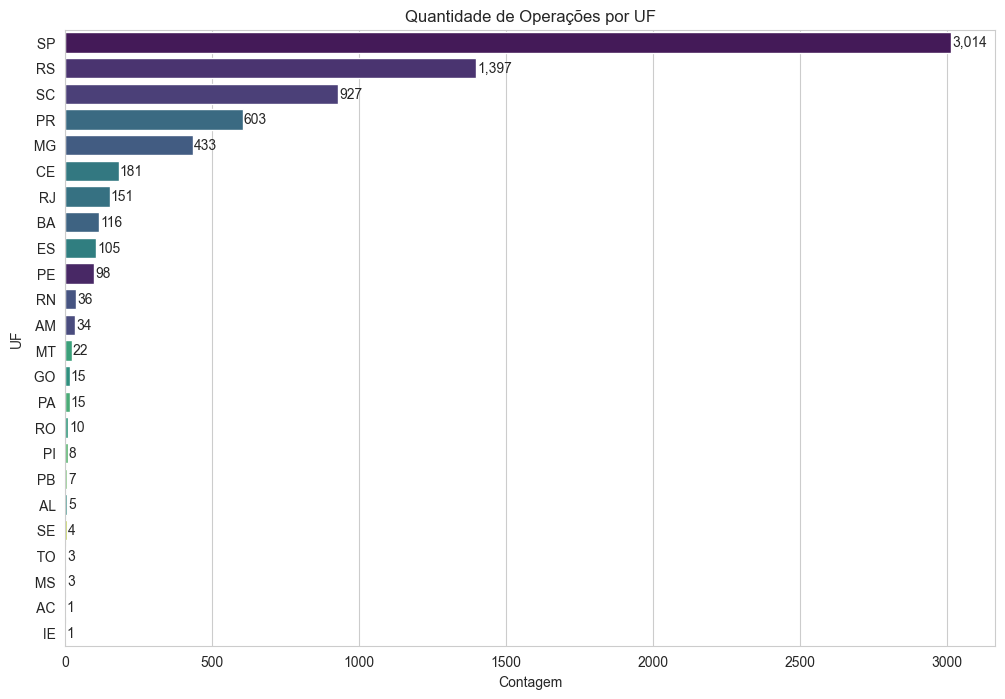

In [41]:
grafico = sns.countplot(y=df['uf'], order = df['uf'].value_counts().index, hue=df['uf'] , palette='viridis')

for container in grafico.containers:
    grafico.bar_label(container, fmt='{:,.0f}', padding=0.8)

plt.title('Quantidade de Operações por UF')
plt.xlabel('Contagem')
plt.ylabel('UF')
plt.show()

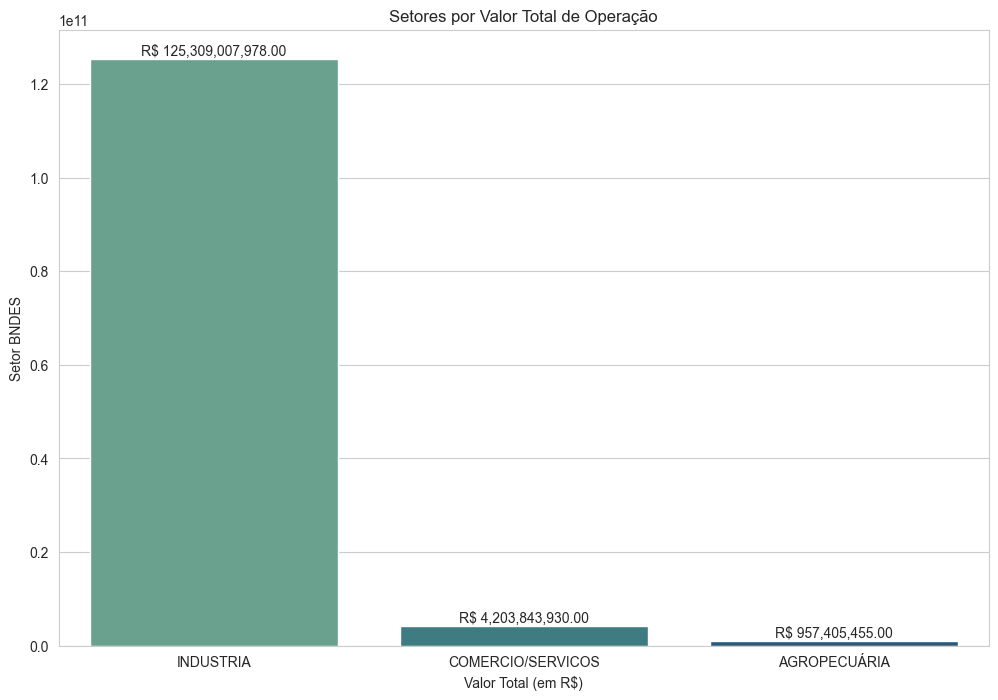

In [42]:
valor_por_setor = df.groupby('setor_bndes')['valor_da_operacao_em_reais'].sum().sort_values(ascending=False)

grafico = sns.barplot(x=valor_por_setor.index, y=valor_por_setor.values, hue=valor_por_setor.index, palette='crest')

for container in grafico.containers:
    grafico.bar_label(container, fmt='R$ {:,.2f}', padding=0.8)

plt.title('Setores por Valor Total de Operação')
plt.xlabel('Valor Total (em R$)')
plt.ylabel('Setor BNDES')
plt.show()


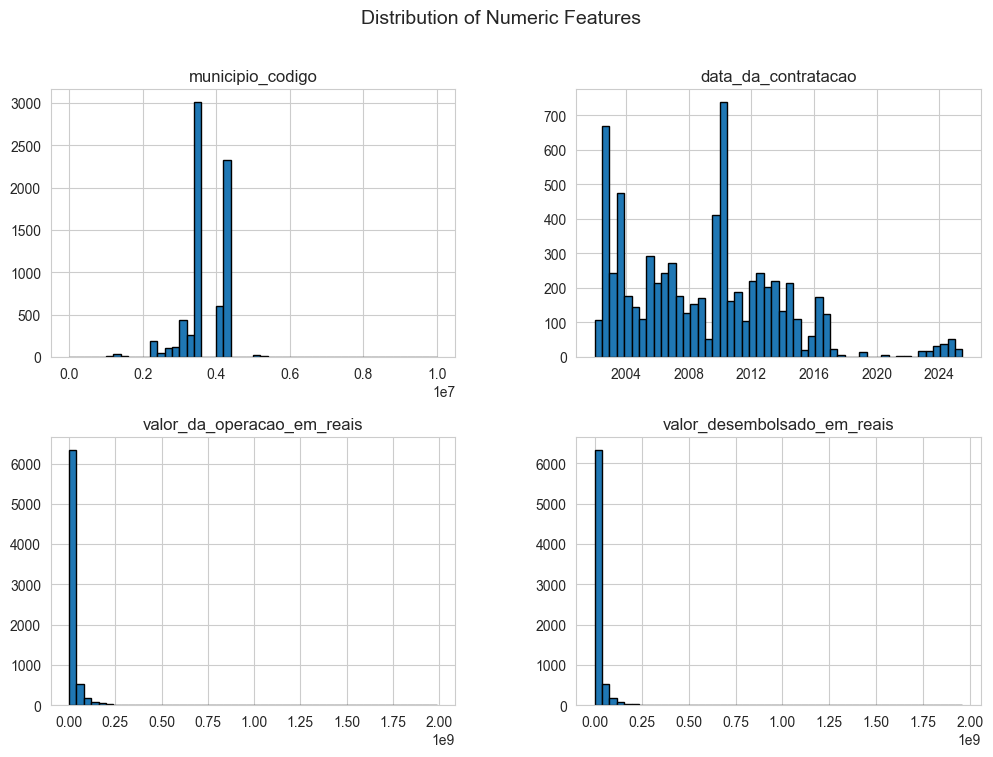

In [43]:
df.hist(figsize=(12, 8), bins=50, edgecolor='black')  
plt.suptitle('Distribution of Numeric Features', fontsize=14)  
plt.show()


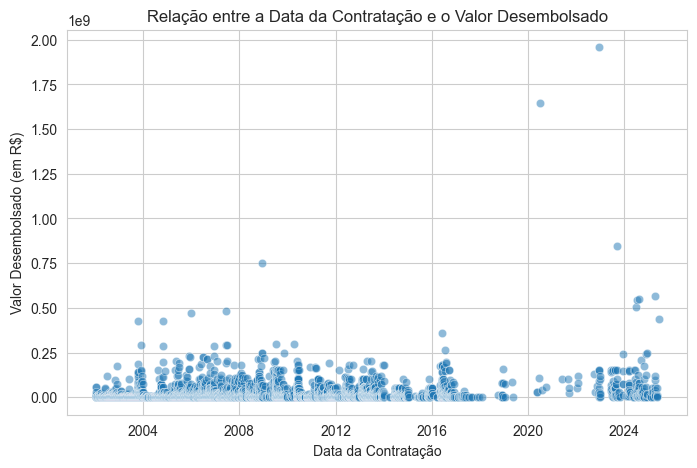

In [44]:
plt.figure(figsize=(8, 5))  
sns.scatterplot(x=df['data_da_contratacao'], y=df['valor_desembolsado_em_reais'], alpha=0.5)  
plt.title('Relação entre a Data da Contratação e o Valor Desembolsado')  
plt.xlabel('Data da Contratação')  
plt.ylabel('Valor Desembolsado (em R$)')  
plt.show()


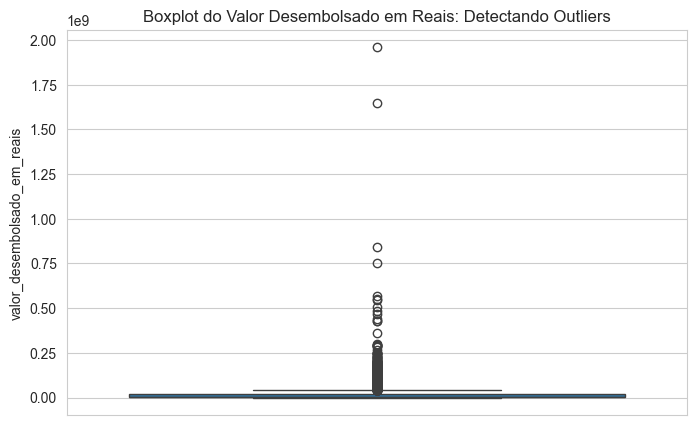

In [45]:
plt.figure(figsize=(8, 5))  
sns.boxplot(y=df['valor_desembolsado_em_reais'])  
plt.title('Boxplot do Valor Desembolsado em Reais: Detectando Outliers')  
plt.show()

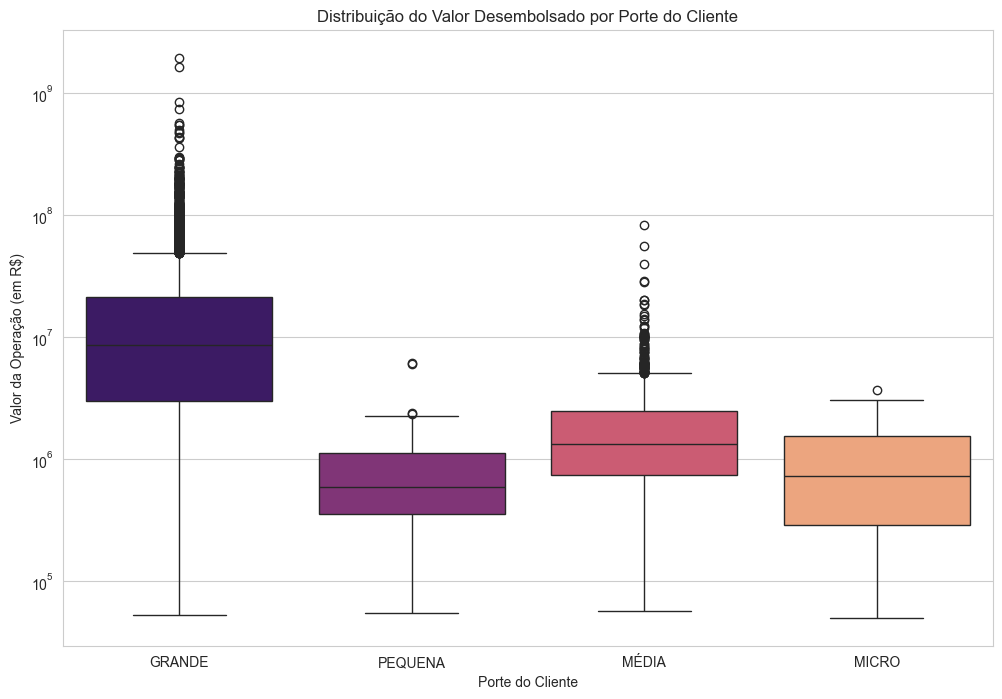

In [46]:
sns.boxplot(x='porte_do_cliente', y='valor_desembolsado_em_reais', hue= 'porte_do_cliente', data=df, palette='magma')
plt.title('Distribuição do Valor Desembolsado por Porte do Cliente')
plt.xlabel('Porte do Cliente')
plt.ylabel('Valor da Operação (em R$)')
plt.yscale('log') # Usar escala logarítmica para lidar com outliers
plt.show()